In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import StratifiedKFold
from joblib import load, dump
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from torchvision import models as md
from efficientnet_pytorch import EfficientNet

md_ef =  EfficientNet.from_pretrained('efficientnet-b5', num_classes=1) 


Loaded pretrained weights for efficientnet-b5


In [2]:
FOLD = 0
EXP_NAME = f'NB_EXP_740_CV_{FOLD}'
PATH = Path('../')
OLD_TRAIN = PATH/'old_train.csv'
OLD_TEST  = PATH/'old_test.csv'
TRAIN     = PATH/'train.csv'
IMG_OLD_TRAIN_224 = PATH/'old_train_images_224_crop'
IMG_OLD_TEST_224  = PATH/'old_test_images_224_crop'
IMG_TRAIN_224     = PATH/'train_images_224_crop'
BS = 128
SZ = 224

In [3]:
def apply_path(path, exten, df, col_name='image'):
    df[col_name] = df[col_name].apply(lambda x: f'{str(path)}/{x}{exten}')
    return df


def get_ign_list(df):
    ignore_list = ['2b21d293fdf2.png','4d7d6928534a.png','a505981d1cab.png','2923971566fe.png','05a5183c92d0.png','30cab14951ac.png','6b00cb764237.png','35aa7f5c2ec0.png','03676c71ed1b.png','7550966ef777.png','0c7e82daf5a0.png','2cceb07ff706.png','1c9c583c10bf.png','026dcd9af143.png','fe0fc67c7980.png','0ac436400db4.png','14515b8f19b6.png','3cd801ffdbf0.png','3dbfbc11e105.png','1cb814ed6332.png','012a242ac6ff.png','b187b3c93afb.png','034cb07a550f.png','a9e984b57556.png','b9127e38d9b9.png','4ce74e5eb51d.png','278aa860dffd.png','1b4625877527.png','bb7e0a2544cd.png','01c31b10ab99.png','4fecf87184e6.png','d28bd830c171.png','530d78467615.png','bcdc8db5423b.png','51131b48f9d4.png','6165081b9021.png','bacfb1029f6b.png','5e7db41b3bee.png','aeed1f251ceb.png','fda39982a810.png','1dfbede13143.png','80feb1f7ca5e.png','a8b637abd96b.png','5eb311bcb5f9.png','e12d41e7b221.png','4a44cc840ebe.png','e4e343eaae2a.png','ce887b196c23.png','23d7ca170bdb.png','b8ac328009e0.png','9c5dd3612f0c.png','f23902998c21.png','1ae8c165fd53.png','9f1efb799b7b.png','68332fdcaa70.png','aca88f566228.png','144b01e7b993.png','7e160c8b611e.png','14e3f84445f7.png','e39b627cf648.png','1c5e6cdc7ee1.png','ca0f1a17c8e5.png','8cb6b0efaaac.png','80964d8e0863.png','1632c4311fc9.png','9a3c03a5ad0f.png','7005be54cab1.png','5b76117c4bcb.png','f066db7a2efe.png','840527bc6628.png','b06dabab4f09.png','48c49f662f7d.png','d51b3fe0fa1b.png','9b7b6e4db1d5.png','9b32e8ef0ca0.png','04ac765f91a1.png','40e9b5630438.png','1ee1eb7943db.png','9b418ce42c13.png','e4151feb8443.png','1006345f70b7.png','7a0cff4c24b2.png','0161338f53cc.png','fcc6aa6755e6.png','8446826853d0.png','1c4d87baaffc.png','e740af6ac6ea.png','3a1d3ce00f0c.png','0cb14014117d.png','11242a67122d.png','36041171f441.png','1c6d119c3d70.png','75a7bc945b7d.png','3f44d749cd0b.png','ca891d37a43c.png','f03d3c4ce7fb.png','a1b12fdce6c3.png','025a169a0bb0.png','9e3510963315.png','36677b70b1ef.png','2f7789c1e046.png','76cfe8967f7d.png','98f7136d2e7a.png','7b691d9ced34.png','3b4a5fcbe5e0.png','60f15dd68d30.png','a8e88d4891c4.png','b91ef82e723a.png','3fd7df6099e3.png','0dce95217626.png','12e3f5f2cb17.png','a8582e346df0.png','6253f23229b1.png','d0079cc188e9.png','ab50123abadb.png','7877be80901c.png','b29bd35acaf6.png','00cb6555d108.png','521d3e264d71.png','f7edc074f06b.png','1411c8ab7161.png','42a850acd2ac.png','42985aa2e32f.png','26e231747848.png','46cdc8b685bd.png','e8d1c6c07cf2.png','f0f89314e860.png','ba735b286d62.png','2df07eb5779f.png','1a1b4b2450ca.png','65e51e18242b.png','1e9224ccca95.png','71c1a3cdbe47.png','135575dc57c9.png','1638404f385c.png','9bf060db8376.png','3ee4841936ef.png','80d24897669f.png','7525ebb3434d.png','c546670d9684.png','ea15a290eb96.png','38487e1a5b1f.png','111898ab463d.png','7a3ea1779b13.png','b13d72ceea26.png','6c3745a222da.png','5dc23e440de3.png','f1a761c68559.png','7d261f986bef.png','8ef2eb8c51c4.png','1e8a1fdee5b9.png','848091b1f5d0.png','22895c89792f.png','8fc09fecd22f.png','a47432cd41e7.png','cd3fd04d72f5.png','c027e5482e8c.png','19722bff5a09.png','bfefa7344e7d.png','a75bab2463d4.png','07419eddd6be.png']
    ts = []
    for k, i in enumerate(df['image']):
        if i.split('/')[-1] in ignore_list:
            ts.append(k)
            
    bad_list = df.index.isin(ts)
    df_local = df[~bad_list].copy()
    df_local.reset_index(inplace=True, drop=True)
    print (df_local.shape)
    return df_local


def get_all_data():
    df_old_test = pd.read_csv(OLD_TEST).drop('Usage', axis=1)
    df_old_train = pd.read_csv(OLD_TRAIN)
    df_train = pd.read_csv(TRAIN)
    
    df_old_train.columns = ['image', 'labels']
    df_train.columns = ['image', 'labels']
    df_old_test.columns = ['image', 'labels']
    
    
    apply_path(IMG_OLD_TRAIN_224, '.jpeg', df_old_train)
    apply_path(IMG_OLD_TEST_224, '.jpeg', df_old_test)
    apply_path(IMG_TRAIN_224, '.png', df_train)
    
    return pd.concat([df_old_test, df_old_train, get_ign_list(df_train)], ignore_index=True)


def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.round(y_hat), y, weights='quadratic'),device='cuda:0')

def strt_split(x, y, n_folds=5, random_seed = 42, path=Path('')):  
    try: 
        val_name = load('val_idx.joblib')
    except:
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_seed)
        val_name = [(val_idx, trn_idx) for trn_idx, val_idx in skf.split(x, y)]
        dump(val_name,'val_idx.joblib')
    return val_name

In [14]:
df = get_all_data()
val_idx = strt_split(df['image'], df['labels'])[FOLD]

tfms = get_transforms(do_flip=True, 
                      flip_vert=True,
                      max_rotate=360,
                      max_zoom=False, 
                      max_lighting=0.1,
                      p_lighting=0.5,
                      xtra_tfms=zoom_crop(scale=(1.01, 1.35), do_rand=True))


data = ( ImageList.from_df(df=df, path='', cols='image')
        .split_by_idxs(valid_idx=val_idx[0], train_idx=val_idx[1])
        .label_from_df(cols='labels', label_cls=FloatList)
        .transform(tfms,size=SZ) #Data augmentation
        .databunch(bs=BS)
        .normalize(imagenet_stats)     
       )

(3504, 2)


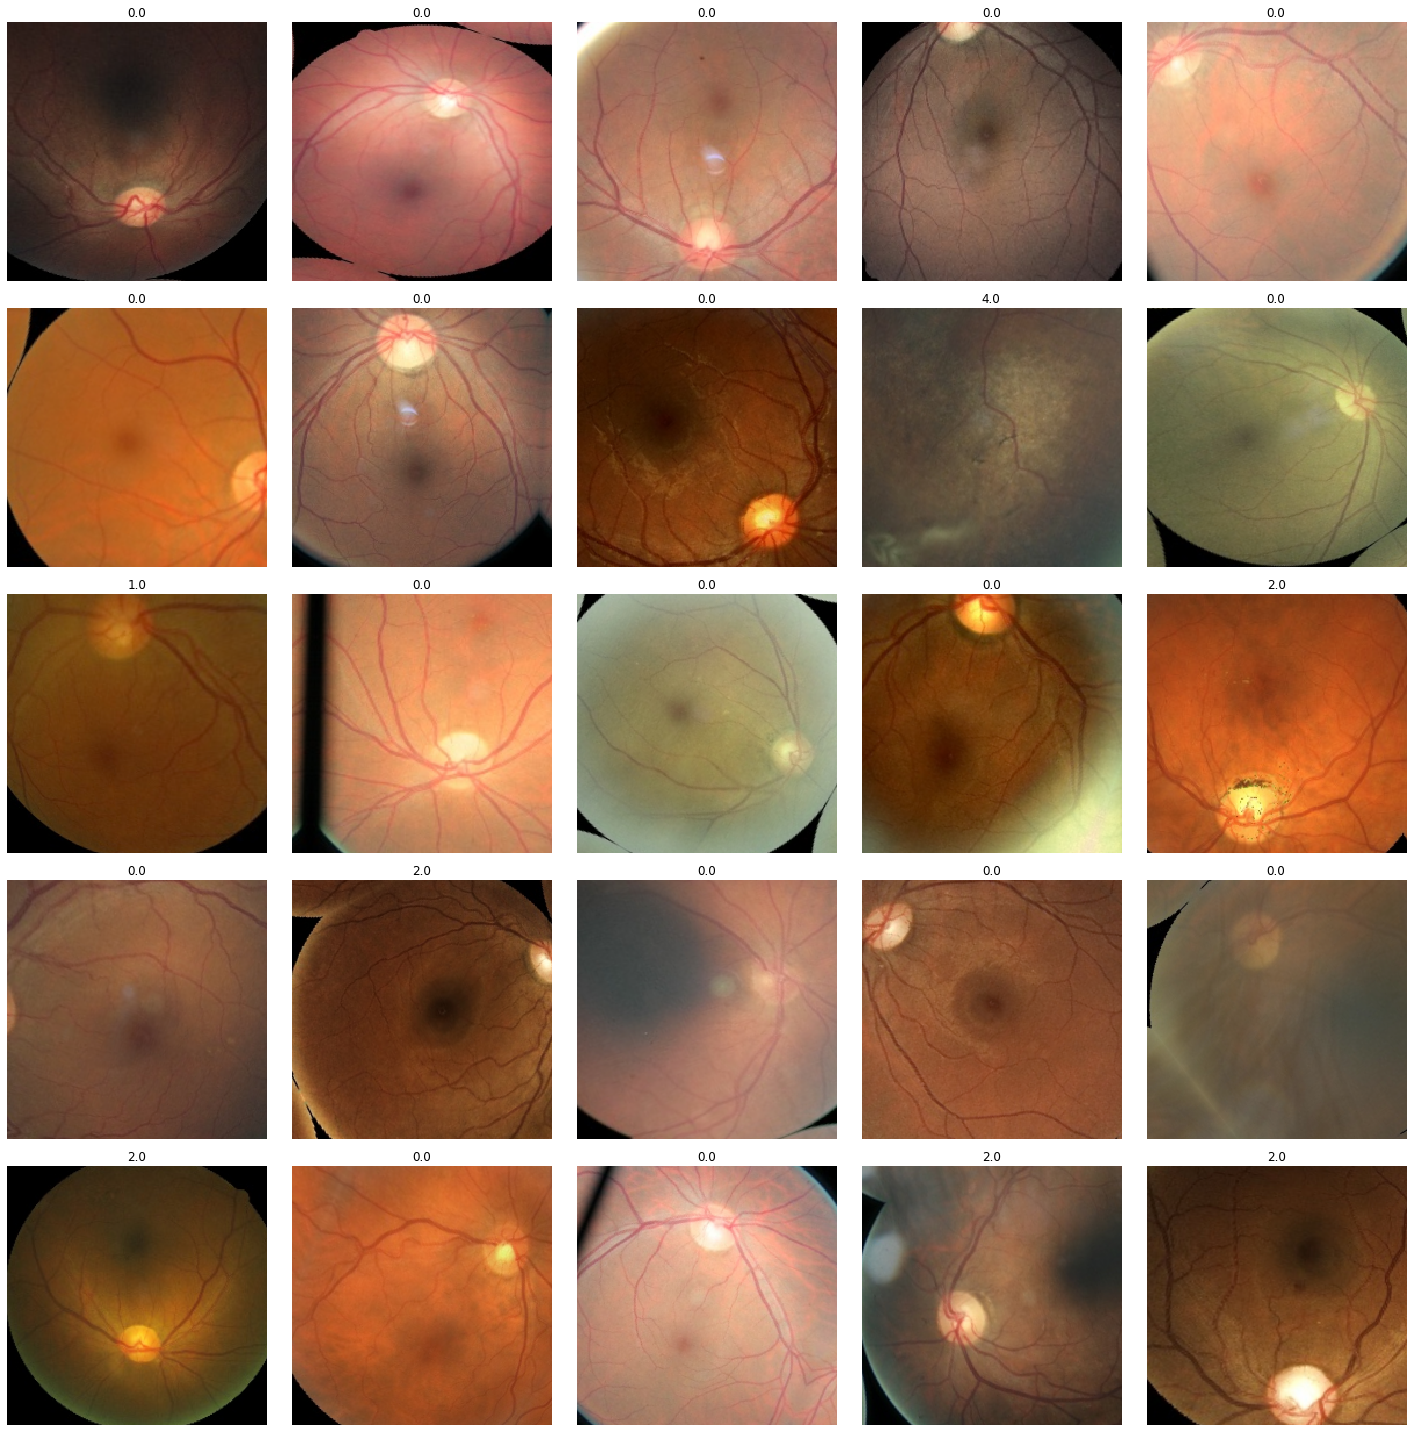

In [15]:
data.show_batch()

In [16]:
learn = Learner(data, md_ef, metrics = [quadratic_kappa], model_dir="models")
learn.model = nn.DataParallel(learn.model)
learn.to_fp16()
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


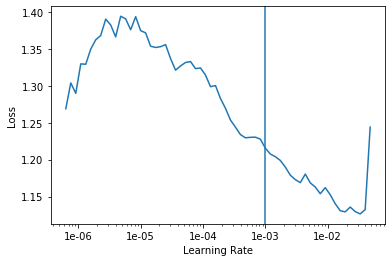

In [18]:
lr = 1e-3
learn.recorder.plot()
plt.axvline(lr)

In [19]:
SUFFIX = 'UNFREEZE_P1'
learn.fit_one_cycle(10,
                    lr, 
                    wd=1e-2,
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor='valid_loss', name = f'{EXP_NAME}_{SUFFIX}')])

Better model found at epoch 0 with valid_loss value: 0.5319914221763611.
Better model found at epoch 1 with valid_loss value: 0.49301213026046753.
Better model found at epoch 3 with valid_loss value: 0.4500250220298767.
Better model found at epoch 4 with valid_loss value: 0.4244545102119446.
Better model found at epoch 5 with valid_loss value: 0.42396631836891174.
Better model found at epoch 6 with valid_loss value: 0.3567109704017639.
Better model found at epoch 8 with valid_loss value: 0.353475958108902.
Better model found at epoch 9 with valid_loss value: 0.34683695435523987.


In [20]:
SUFFIX = 'UNFREEZE_P2'
learn.fit_one_cycle(5,
                    lr/5, 
                    wd=1e-2,
                    div_factor=10, 
                    pct_start=0.3,
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor='valid_loss', name = f'{EXP_NAME}_{SUFFIX}')])

Better model found at epoch 0 with valid_loss value: 0.34746381640434265.
Better model found at epoch 2 with valid_loss value: 0.3433593511581421.
Better model found at epoch 3 with valid_loss value: 0.3429561257362366.


In [33]:

BS = 52
SZ = 352

EXP_NAME = f'NB_EXP_740_CV_{FOLD}_{SZ}'
PATH = Path('../')
OLD_TRAIN = PATH/'old_train.csv'
OLD_TEST  = PATH/'old_test.csv'
TRAIN     = PATH/'train.csv'
IMG_OLD_TRAIN_224 = PATH/'old_train_images_512_crop'
IMG_OLD_TEST_224  = PATH/'old_test_images_512_crop'
IMG_TRAIN_224     = PATH/'train_images_512_crop'

In [34]:
df = get_all_data()
val_idx = strt_split(df['image'], df['labels'])[FOLD]

tfms = get_transforms(do_flip=True, 
                      flip_vert=True,
                      max_rotate=360,
                      max_zoom=False, 
                      max_lighting=0.1,
                      p_lighting=0.5,
                      xtra_tfms=zoom_crop(scale=(1.01, 1.35), do_rand=True))


data = ( ImageList.from_df(df=df, path='', cols='image')
        .split_by_idxs(valid_idx=val_idx[0], train_idx=val_idx[1])
        .label_from_df(cols='labels', label_cls=FloatList)
        .transform(tfms,size=SZ) #Data augmentation
        .databunch(bs=BS)
        .normalize(imagenet_stats)     
       )

(3504, 2)


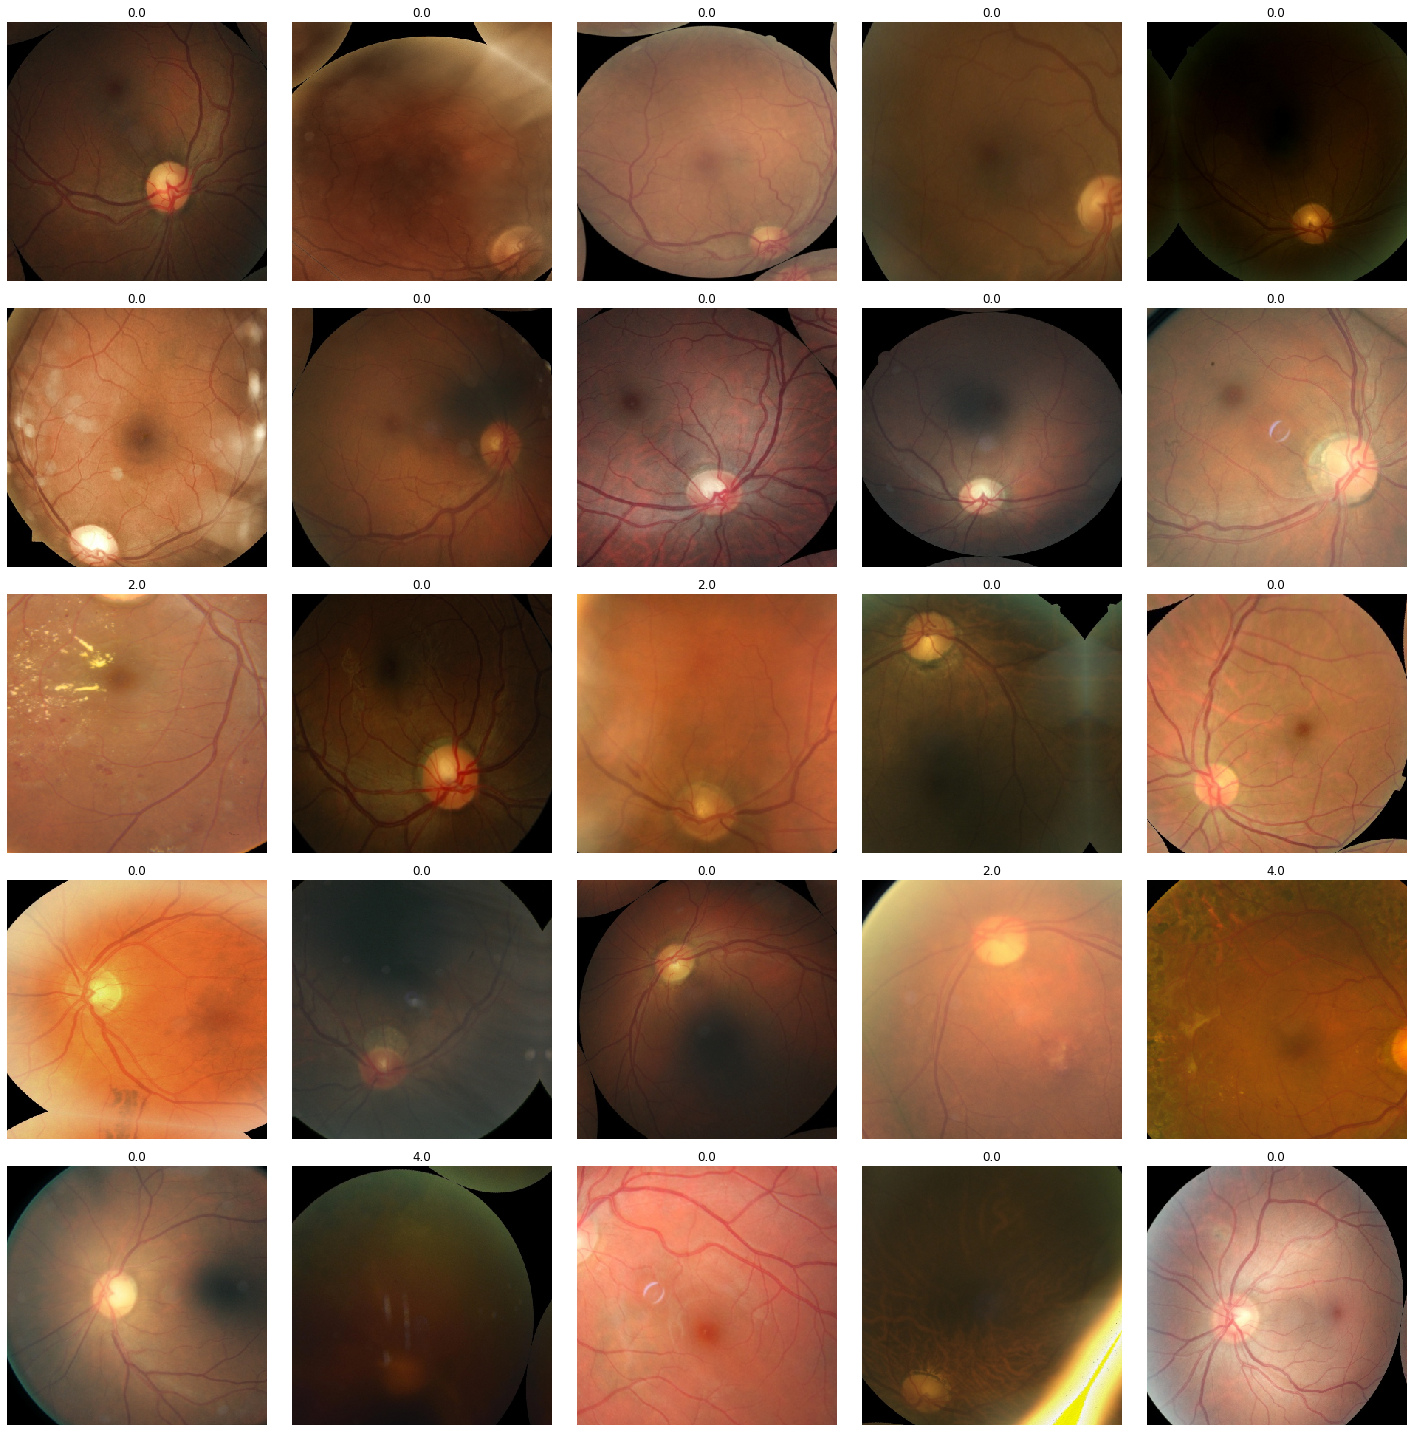

In [40]:
data.show_batch()

In [35]:
learn = Learner(data, md_ef, metrics = [quadratic_kappa], model_dir="models")
learn.model = nn.DataParallel(learn.model)
learn.load('NB_EXP_740_CV_0_UNFREEZE_P2')
learn.to_fp16()
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


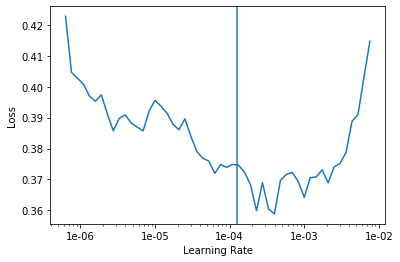

In [39]:
lr = 1e-3/8
learn.recorder.plot(skip_end=10)
plt.axvline(lr)

In [41]:
SUFFIX = 'UNFREEZE_P1'
learn.fit_one_cycle(5,
                    lr, 
                    wd=1e-2,
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor='valid_loss', name = f'{EXP_NAME}_{SUFFIX}')])

Better model found at epoch 0 with valid_loss value: 0.2675597071647644.
Better model found at epoch 1 with valid_loss value: 0.2601575553417206.
Better model found at epoch 2 with valid_loss value: 0.2547816336154938.
Better model found at epoch 3 with valid_loss value: 0.25345978140830994.
Better model found at epoch 4 with valid_loss value: 0.25258225202560425.


In [4]:

BS = 32
SZ = 448

EXP_NAME = f'NB_EXP_740_CV_{FOLD}_{SZ}'
PATH = Path('../')
OLD_TRAIN = PATH/'old_train.csv'
OLD_TEST  = PATH/'old_test.csv'
TRAIN     = PATH/'train.csv'
IMG_OLD_TRAIN_224 = PATH/'old_train_images_512_crop'
IMG_OLD_TEST_224  = PATH/'old_test_images_512_crop'
IMG_TRAIN_224     = PATH/'train_images_512_crop'

In [5]:
df = get_all_data()
val_idx = strt_split(df['image'], df['labels'])[FOLD]

tfms = get_transforms(do_flip=True, 
                      flip_vert=True,
                      max_rotate=360,
                      max_zoom=False, 
                      max_lighting=0.1,
                      p_lighting=0.5,
                      xtra_tfms=zoom_crop(scale=(1.01, 1.35), do_rand=True))


data = ( ImageList.from_df(df=df, path='', cols='image')
        .split_by_idxs(valid_idx=val_idx[0], train_idx=val_idx[1])
        .label_from_df(cols='labels', label_cls=FloatList)
        .transform(tfms,size=SZ) #Data augmentation
        .databunch(bs=BS)
        .normalize(imagenet_stats)     
       )

(3504, 2)


In [8]:
learn = Learner(data, md_ef, metrics = [quadratic_kappa], model_dir="models")
learn.load('NB_EXP_740_CV_0_352_UNFREEZE_P1')
learn.model = nn.DataParallel(learn.model)
learn.to_fp16()
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


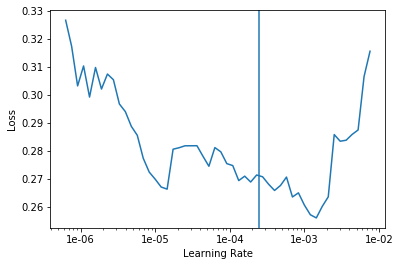

In [9]:
lr = 1e-3/4
learn.recorder.plot(skip_end=10)
plt.axvline(lr)

In [10]:
SUFFIX = 'UNFREEZE_P1'
learn.fit_one_cycle(5,
                    lr, 
                    wd=1e-2,
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor='valid_loss', name = f'{EXP_NAME}_{SUFFIX}')])

Better model found at epoch 0 with valid_loss value: 0.2571529448032379.
Better model found at epoch 2 with valid_loss value: 0.2505532205104828.
Better model found at epoch 3 with valid_loss value: 0.24611826241016388.
